# BANKING

# obtain data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms
%matplotlib inline

In [2]:
data=pd.read_csv("train_ml.csv")

C:\Users\lakshman\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (15,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,70473,4350,4350,825.0,36 months,BAT4347689,8.07,A,A4,NaN,...,NaN,NaN,INDIVIDUAL,NaN,157th week,NaN,NaN,NaN,NaN,1
1,70735,6500,6500,0.0,36 months,BAT2331079,8.38,A,A5,NaN,...,NaN,NaN,INDIVIDUAL,NaN,157th week,NaN,NaN,NaN,NaN,1
2,70978,3500,3500,2225.0,36 months,BAT4347689,7.43,A,A2,self-employed,...,NaN,NaN,INDIVIDUAL,NaN,161th week,0.0,NaN,NaN,NaN,1
3,72816,7200,5075,350.0,36 months,BAT5869156,10.28,C,C1,NaN,...,NaN,NaN,INDIVIDUAL,NaN,157th week,NaN,NaN,NaN,NaN,1
4,72992,1000,1000,0.0,36 months,BAT2331079,9.64,B,B4,Halping hands company inc.,...,NaN,NaN,INDIVIDUAL,NaN,157th week,NaN,NaN,NaN,NaN,1


In [4]:
data.tail()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
425898,73519677,12500,12500,12500.0,36 months,BAT2803411,7.49,A,A4,manager,...,0.0,NaN,INDIVIDUAL,NaN,NAth week,0.0,0.0,10009.0,12400.0,0
425899,73519699,8000,8000,8000.0,36 months,BAT2803411,11.48,B,B5,Vendor liaison,...,0.0,75.0,INDIVIDUAL,NaN,NAth week,0.0,0.0,199696.0,18000.0,0
425900,73519894,15000,15000,15000.0,60 months,BAT2803411,10.78,B,B4,Senior Buyer,...,0.0,NaN,INDIVIDUAL,NaN,NAth week,0.0,0.0,224194.0,35400.0,0
425901,73542831,1400,1400,1400.0,36 months,BAT2803411,12.88,C,C2,Logistics Manager,...,0.0,NaN,INDIVIDUAL,NaN,NAth week,0.0,0.0,325695.0,56300.0,0
425902,73544841,17600,17600,17600.0,60 months,BAT2803411,19.89,E,E3,RN,...,0.0,NaN,INDIVIDUAL,NaN,NAth week,0.0,0.0,133285.0,12600.0,0


In [5]:
data.shape

(425903, 45)

In [6]:
data.size

19165635

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425903 entries, 0 to 425902
Data columns (total 45 columns):
member_id                      425903 non-null int64
loan_amnt                      425903 non-null int64
funded_amnt                    425903 non-null int64
funded_amnt_inv                425903 non-null float64
term                           425903 non-null object
batch_enrolled                 357642 non-null object
int_rate                       425903 non-null float64
grade                          425903 non-null object
sub_grade                      425903 non-null object
emp_title                      401427 non-null object
emp_length                     425903 non-null object
home_ownership                 425903 non-null object
annual_inc                     425900 non-null float64
verification_status            425903 non-null object
pymnt_plan                     425903 non-null object
desc                           60286 non-null object
purpose                   

In [8]:
data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,4.259030e+05,425903.000000,425903.000000,425903.000000,425903.000000,4.259000e+05,425903.000000,425892.000000,425892.000000,207813.000000,...,425903.000000,425903.000000,425903.000000,425830.000000,106543.000000,425892.000000,392352.000000,3.923520e+05,3.923520e+05,425903.000000
mean,3.502441e+07,14755.873462,14742.455618,14703.380731,13.242416,7.505885e+04,18.140406,0.313880,0.693460,34.066401,...,0.399942,45.927254,4.901791,0.014222,44.196362,0.004975,215.213334,1.395269e+05,3.203371e+04,0.235500
std,2.410949e+07,8438.444215,8432.992986,8445.190279,4.382469,6.699008e+04,8.386781,0.856321,0.996467,21.878348,...,4.067117,413.778293,64.051409,0.131521,22.219313,0.079570,1978.439164,1.539149e+05,3.920350e+04,0.424311
min,7.047300e+04,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.087869e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.982275e+04,1.390000e+04,0.000000
50%,3.710672e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,...,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.081850e+04,2.370000e+04,0.000000
75%,5.847982e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,62.000000,0.000000,0.000000,2.083942e+05,3.980000e+04,0.000000
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,...,294.680000,33520.270000,6972.590000,14.000000,180.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


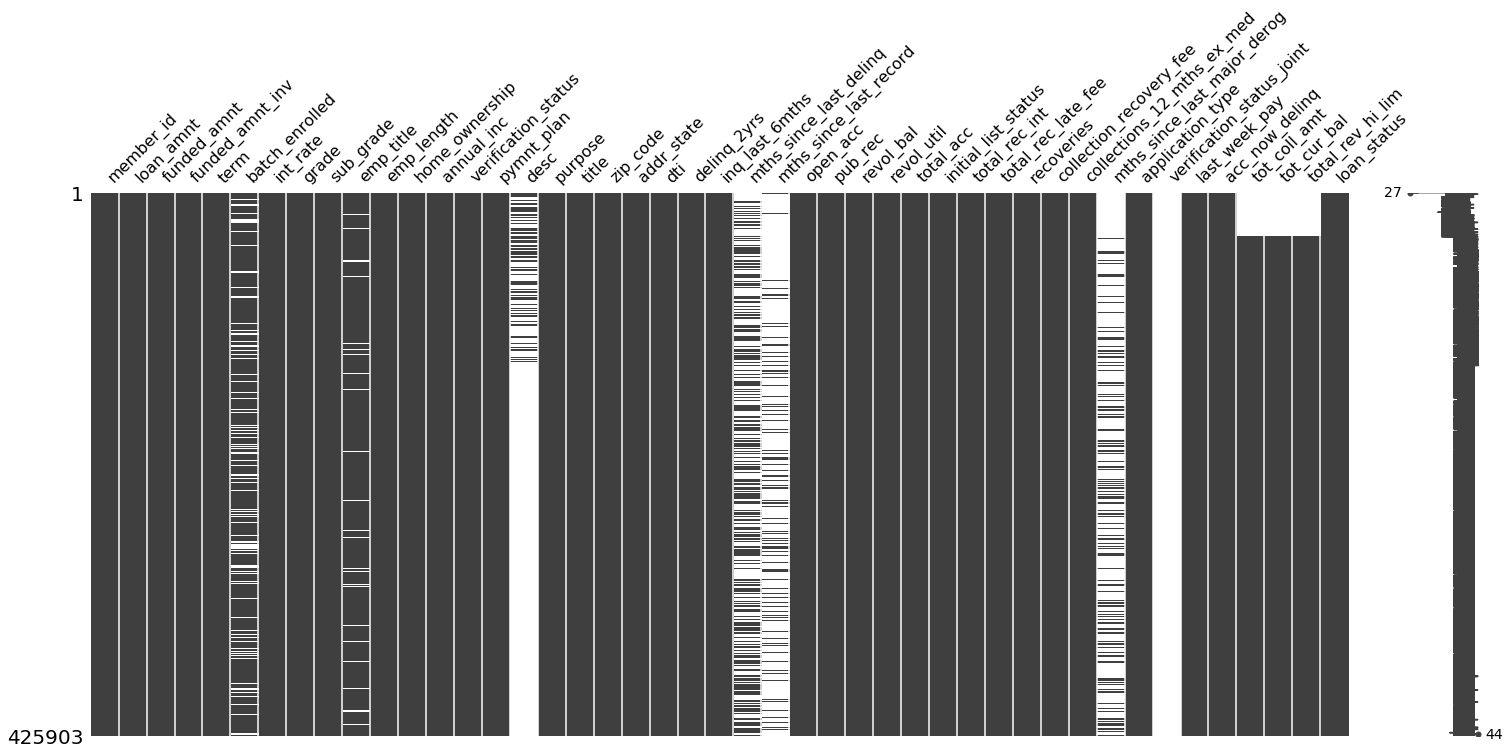

In [9]:
ms.matrix(data)

In [10]:
data.corr()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
member_id,1.000000,0.065352,0.067651,0.073147,-0.139901,0.034178,0.133539,0.049887,-0.127662,-0.008617,...,-0.076312,-0.113223,-0.072005,0.051502,0.055830,0.017023,0.026016,0.007032,0.044385,-0.490264
loan_amnt,0.065352,1.000000,0.999265,0.997122,0.145261,0.320927,0.041779,-0.000732,-0.034130,-0.037737,...,0.031681,0.072880,0.052062,-0.014963,-0.038312,0.003573,-0.020379,0.326861,0.298917,-0.095438
funded_amnt,0.067651,0.999265,1.000000,0.998051,0.145463,0.320775,0.042665,-0.000439,-0.034733,-0.037736,...,0.031291,0.072426,0.051895,-0.014802,-0.038297,0.003675,-0.020378,0.326859,0.298916,-0.097337
funded_amnt_inv,0.073147,0.997122,0.998051,1.000000,0.145503,0.319862,0.044904,-0.000005,-0.038748,-0.035474,...,0.027984,0.070749,0.049286,-0.014382,-0.038263,0.003835,-0.020382,0.326888,0.298951,-0.101644
int_rate,-0.139901,0.145261,0.145463,0.145503,1.000000,-0.070760,0.163592,0.056602,0.228154,-0.033077,...,0.056848,0.106925,0.070469,0.015237,-0.015472,0.027584,0.002715,-0.091911,-0.160017,0.001947
annual_inc,0.034178,0.320927,0.320775,0.319862,-0.070760,1.000000,-0.172125,0.047538,0.031784,-0.050079,...,0.012984,0.007422,0.006218,-0.005039,-0.039216,0.014770,0.000159,0.406604,0.253185,-0.009043
dti,0.133539,0.041779,0.042665,0.044904,0.163592,-0.172125,1.000000,-0.007419,-0.015911,0.006061,...,-0.012407,0.001768,0.003516,0.001263,0.029438,0.007252,-0.015866,-0.014489,0.065912,-0.132718
delinq_2yrs,0.049887,-0.000732,-0.000439,-0.000005,0.056602,0.047538,-0.007419,1.000000,0.021890,-0.567751,...,0.018671,0.000027,0.000290,0.064554,-0.424708,0.136631,0.000927,0.067031,-0.038811,-0.045732
inq_last_6mths,-0.127662,-0.034130,-0.034733,-0.038748,0.228154,0.031784,-0.015911,0.021890,1.000000,0.012485,...,0.033947,0.044538,0.031945,0.007769,0.018514,-0.003330,0.013730,0.032287,0.006033,0.087725
mths_since_last_delinq,-0.008617,-0.037737,-0.037736,-0.035474,-0.033077,-0.050079,0.006061,-0.567751,0.012485,1.000000,...,-0.020221,-0.002506,-0.003299,-0.035432,0.697123,-0.135171,0.034405,-0.095224,-0.023369,0.028167


Text(0.5,1,'data.corr()')

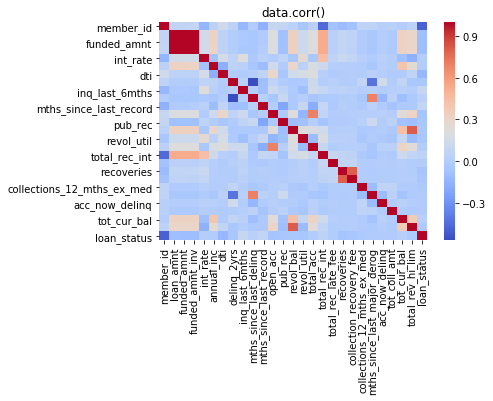

In [11]:
sns.heatmap(data.corr(),cmap='coolwarm',xticklabels=True)
plt.title('data.corr()')

In [12]:
m_s_l_m_d=data["mths_since_last_major_derog"]

In [13]:
verification=data["verification_status_joint"]

In [14]:
desc=data["desc"]

In [15]:
month_since_last_record=data["mths_since_last_record"]

In [16]:
data.drop(["verification_status_joint","mths_since_last_record","desc","mths_since_last_major_derog"],inplace=True,axis=1)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425903 entries, 0 to 425902
Data columns (total 41 columns):
member_id                     425903 non-null int64
loan_amnt                     425903 non-null int64
funded_amnt                   425903 non-null int64
funded_amnt_inv               425903 non-null float64
term                          425903 non-null object
batch_enrolled                357642 non-null object
int_rate                      425903 non-null float64
grade                         425903 non-null object
sub_grade                     425903 non-null object
emp_title                     401427 non-null object
emp_length                    425903 non-null object
home_ownership                425903 non-null object
annual_inc                    425900 non-null float64
verification_status           425903 non-null object
pymnt_plan                    425903 non-null object
purpose                       425903 non-null object
title                         425829 non-

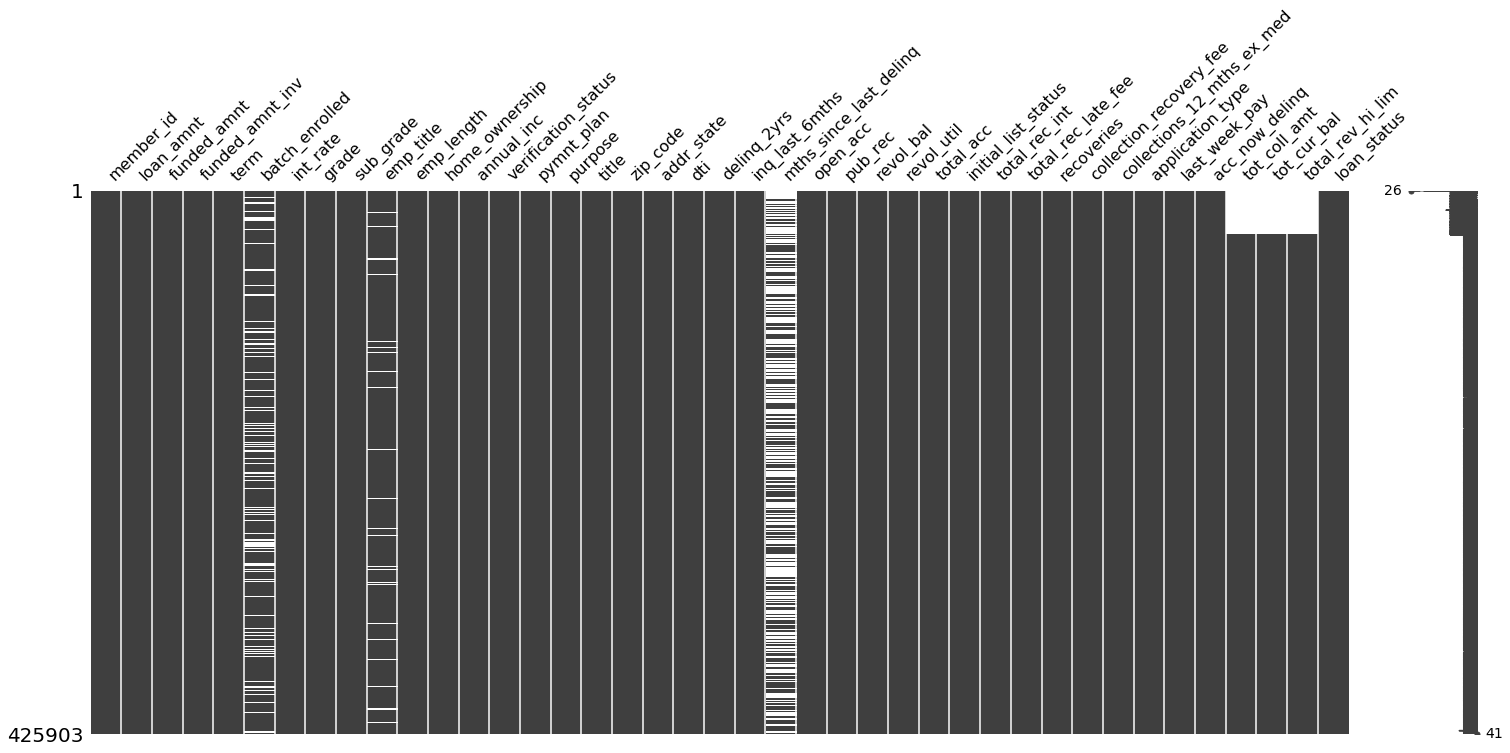

In [18]:
ms.matrix(data)

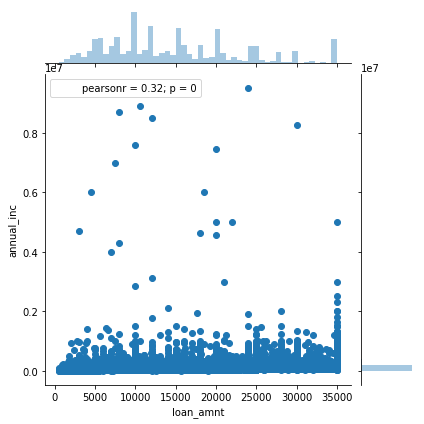

In [19]:
sns.jointplot(x='loan_amnt',y='annual_inc',data=data)

In [22]:
data["annual_inc"].fillna(value=data["annual_inc"].min(),inplace=True)

In [23]:
data["delinq_2yrs"].fillna(value=data["delinq_2yrs"].median(),inplace=True)

In [24]:
data["inq_last_6mths"].fillna(value=data["inq_last_6mths"].median(),inplace=True)

In [25]:
data["open_acc"].fillna(value=data["open_acc"].median(),inplace=True)

In [26]:
data["pub_rec"].fillna(value=data["pub_rec"].median(),inplace=True)

In [27]:
data["revol_util"].fillna(value=data["revol_util"].median(),inplace=True)

In [28]:
data["total_acc"].fillna(value=data["total_acc"].median(),inplace=True)

In [29]:
data["total_acc"].fillna(value=data["total_acc"].median(),inplace=True)

In [30]:
data["collections_12_mths_ex_med"].fillna(value=data["collections_12_mths_ex_med"].median(),inplace=True)

In [31]:
data["acc_now_delinq"].fillna(value=data["acc_now_delinq"].median(),inplace=True)

In [32]:
def impute_bal(cols):
    tot_cur_bal = cols[0]
    annual_inc = cols[1]
    
    if pd.isnull(tot_cur_bal):
        
        if annual_inc >= 5.5 and annual_inc <=9.5:
            return data["tot_cur_bal"].median()
        
        elif annual_inc <5.5 and annual_inc >=1.5 :
            return data["tot_cur_bal"].mean()
        
        else:
            return data["tot_cur_bal"].min()

    else:
        return tot_cur_bal



In [33]:
data["tot_cur_bal"] = data[['annual_inc','tot_cur_bal']].apply(impute_bal,axis=1)

In [34]:
def impute_rev(cols):
    total_rev_hi_lim = cols[0]
    annual_inc = cols[1]
    
    if pd.isnull(total_rev_hi_lim):
        
        if annual_inc >= 5.5 and annual_inc <=9.5:
            return data["total_rev_hi_lim"].std()
        
        elif annual_inc <5.5 and annual_inc >=1.5 :
            return data["total_rev_hi_lim"].median()
        
        else:
            return data["total_rev_hi_lim"].mean()

    else:
        return total_rev_hi_lim



In [35]:
data["total_rev_hi_lim"] = data[['annual_inc','total_rev_hi_lim']].apply(impute_rev,axis=1)

In [36]:
def impute_amt(cols):
    tot_coll_amt = cols[0]
    annual_inc = cols[1]
    
    if pd.isnull(tot_coll_amt):
        
        if annual_inc >= 5.5 and annual_inc <=9.5:
            return data["tot_coll_amt"].std()
        
        elif annual_inc <5.5 and annual_inc >=1.5 :
            return data["tot_coll_amt"].mean()
        
        else:
            return data["tot_coll_amt"].median()

    else:
        return tot_coll_amt



In [37]:
data["tot_coll_amt"] = data[['annual_inc','tot_coll_amt']].apply(impute_amt,axis=1)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425903 entries, 0 to 425902
Data columns (total 41 columns):
member_id                     425903 non-null int64
loan_amnt                     425903 non-null int64
funded_amnt                   425903 non-null int64
funded_amnt_inv               425903 non-null float64
term                          425903 non-null object
batch_enrolled                357642 non-null object
int_rate                      425903 non-null float64
grade                         425903 non-null object
sub_grade                     425903 non-null object
emp_title                     401427 non-null object
emp_length                    425903 non-null object
home_ownership                425903 non-null object
annual_inc                    425903 non-null float64
verification_status           425903 non-null object
pymnt_plan                    425903 non-null object
purpose                       425903 non-null object
title                         425829 non-

In [39]:
data["acc_now_delinq"].fillna(value=data["acc_now_delinq"].median(),inplace=True)

In [40]:
data["term"].unique()

array(['36 months', '60 months'], dtype=object)

In [41]:
data["term"].value_counts()

36 months    298178
60 months    127725
Name: term, dtype: int64

In [42]:
term_df = pd.get_dummies(data['term'],drop_first=200)


In [43]:
data["grade"].unique()

array(['A', 'C', 'B', 'D', 'E', 'G', 'F'], dtype=object)

In [44]:
data["grade"].value_counts()

B    122145
C    117817
A     71373
D     66811
E     34119
F     11062
G      2576
Name: grade, dtype: int64

In [45]:
grade_df = pd.get_dummies(data['grade'],drop_first=200)

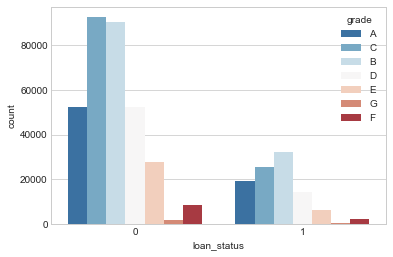

In [46]:
sns.set_style('whitegrid')
sns.countplot(x='loan_status',hue='grade',data=data,palette='RdBu_r')

In [47]:
sub_g=data['sub_grade']

In [48]:
data.drop("sub_grade",axis=1,inplace=True)

In [49]:
emp_tit=data["emp_title"]

In [50]:
data.drop("emp_title",axis=1,inplace=True)

In [51]:
data["emp_length"].unique()

array(['< 1 year', '10+ years', '1 year', '7 years', '3 years', '8 years',
       '5 years', '2 years', '4 years', '9 years', '6 years', 'n/a'], dtype=object)

In [52]:
data["emp_length"].value_counts()

10+ years    140106
2 years       37918
3 years       33835
< 1 year      33695
1 year        27435
5 years       26670
4 years       25163
n/a           21353
7 years       21330
8 years       21272
6 years       20617
9 years       16509
Name: emp_length, dtype: int64

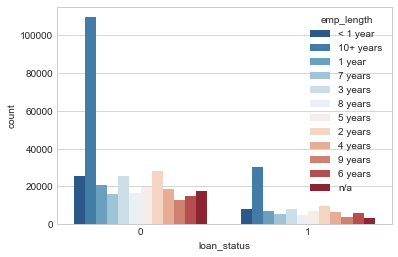

In [53]:
sns.set_style('whitegrid')
sns.countplot(x='loan_status',hue='emp_length',data=data,palette='RdBu_r')

In [54]:
h_owner=data["home_ownership"]

In [55]:
data["home_ownership"].unique()

array(['RENT', 'NONE', 'MORTGAGE', 'OWN', 'OTHER', 'ANY'], dtype=object)

In [56]:
data["home_ownership"].value_counts()

MORTGAGE    212991
RENT        170731
OWN          42058
OTHER           90
NONE            32
ANY              1
Name: home_ownership, dtype: int64

In [57]:
home_df = pd.get_dummies(data['home_ownership'],drop_first=200)


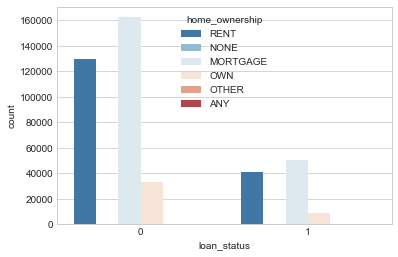

In [58]:
sns.set_style('whitegrid')
sns.countplot(x='loan_status',hue='home_ownership',data=data,palette='RdBu_r')

In [59]:
data["verification_status"].unique()

array(['Not Verified', 'Verified', 'Source Verified'], dtype=object)

In [60]:
data['verification_status'].value_counts()

Source Verified    158328
Verified           139735
Not Verified       127840
Name: verification_status, dtype: int64

In [61]:
verfi_df = pd.get_dummies(data['verification_status'],drop_first=200)


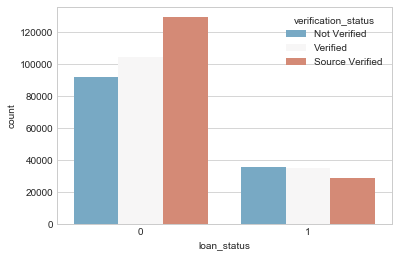

In [62]:
sns.set_style('whitegrid')
sns.countplot(x='loan_status',hue='verification_status',data=data,palette='RdBu_r')

In [63]:
payment_plan=data["pymnt_plan"]

In [64]:
data["pymnt_plan"].unique()

array(['n', 'y'], dtype=object)

In [65]:
data["pymnt_plan"].value_counts()

n    425896
y         7
Name: pymnt_plan, dtype: int64

In [66]:
paymnt_df = pd.get_dummies(data['pymnt_plan'],drop_first=200)


In [67]:
data["purpose"].unique()

array(['other', 'debt_consolidation', 'medical', 'credit_card',
       'educational', 'home_improvement', 'car', 'vacation',
       'small_business', 'moving', 'wedding', 'house', 'major_purchase',
       'renewable_energy'], dtype=object)

In [68]:
purpose_df = pd.get_dummies(data['purpose'],drop_first=200)


In [69]:
d_title=data["title"]

In [70]:
data.drop("title",axis=1,inplace=True)

In [71]:
zip_cod=data["zip_code"]

In [72]:
data.drop("zip_code",axis=1,inplace=True)

In [73]:
add_state=data["addr_state"]

In [74]:
data.drop("addr_state",axis=1,inplace=True)

In [75]:
data["initial_list_status"].unique()

array(['f', 'w'], dtype=object)

In [76]:
data["initial_list_status"].value_counts()

f    219094
w    206809
Name: initial_list_status, dtype: int64

In [77]:
initial_l_s_df = pd.get_dummies(data['initial_list_status'],drop_first=200)

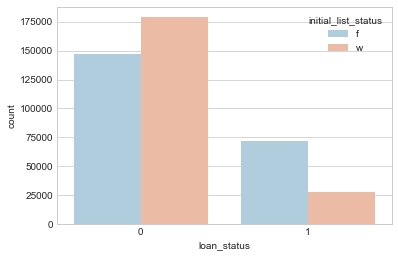

In [78]:
sns.set_style('whitegrid')
sns.countplot(x='loan_status',hue='initial_list_status',data=data,palette='RdBu_r')

In [79]:
data["application_type"].unique()

array(['INDIVIDUAL', 'JOINT'], dtype=object)

In [80]:
data["application_type"].value_counts()

INDIVIDUAL    425655
JOINT            248
Name: application_type, dtype: int64

In [81]:
app_type=data["application_type"]

In [82]:
app_type_df = pd.get_dummies(data['application_type'],drop_first=200)

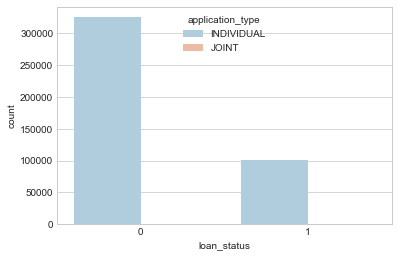

In [83]:
sns.set_style('whitegrid')
sns.countplot(x='loan_status',hue='application_type',data=data,palette='RdBu_r')

In [84]:
data.drop(["term","grade","home_ownership"],axis=1,inplace=True)

In [85]:
data.drop(["verification_status","pymnt_plan","purpose","initial_list_status","application_type"],axis=1,inplace=True)

In [86]:
batch_enroll=data['batch_enrolled']

In [87]:
data.drop("batch_enrolled",axis=1,inplace=True)

In [88]:
data["emp_length"].value_counts()

10+ years    140106
2 years       37918
3 years       33835
< 1 year      33695
1 year        27435
5 years       26670
4 years       25163
n/a           21353
7 years       21330
8 years       21272
6 years       20617
9 years       16509
Name: emp_length, dtype: int64

In [89]:
emp_len=data["emp_length"]

In [90]:
emp_len_df= pd.get_dummies(data['emp_length'],drop_first=200)

In [91]:
data.drop("emp_length",axis=1,inplace=True)

In [92]:
last_w_pay=data["last_week_pay"]

In [93]:
data.drop("last_week_pay",axis=1,inplace=True)

In [94]:
 data = pd.concat([data,term_df,grade_df,home_df,verfi_df,paymnt_df,purpose_df,initial_l_s_df,app_type_df,emp_len_df],axis=1)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425903 entries, 0 to 425902
Data columns (total 66 columns):
member_id                     425903 non-null int64
loan_amnt                     425903 non-null int64
funded_amnt                   425903 non-null int64
funded_amnt_inv               425903 non-null float64
int_rate                      425903 non-null float64
annual_inc                    425903 non-null float64
dti                           425903 non-null float64
delinq_2yrs                   425903 non-null float64
inq_last_6mths                425903 non-null float64
mths_since_last_delinq        207813 non-null float64
open_acc                      425903 non-null float64
pub_rec                       425903 non-null float64
revol_bal                     425903 non-null float64
revol_util                    425903 non-null float64
total_acc                     425903 non-null float64
total_rec_int                 425903 non-null float64
total_rec_late_fee            4

In [96]:
data.drop("mths_since_last_delinq",axis=1,inplace=True)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425903 entries, 0 to 425902
Data columns (total 65 columns):
member_id                     425903 non-null int64
loan_amnt                     425903 non-null int64
funded_amnt                   425903 non-null int64
funded_amnt_inv               425903 non-null float64
int_rate                      425903 non-null float64
annual_inc                    425903 non-null float64
dti                           425903 non-null float64
delinq_2yrs                   425903 non-null float64
inq_last_6mths                425903 non-null float64
open_acc                      425903 non-null float64
pub_rec                       425903 non-null float64
revol_bal                     425903 non-null float64
revol_util                    425903 non-null float64
total_acc                     425903 non-null float64
total_rec_int                 425903 non-null float64
total_rec_late_fee            425903 non-null float64
recoveries                    4

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('loan_status',axis=1), 
                                                    data['loan_status'], test_size=0.20, 
                                                    random_state=42)

In [99]:
from sklearn.linear_model import LogisticRegression

# Build the Model.
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [100]:
predicted =  logmodel.predict(X_test)

In [101]:
from sklearn.metrics import confusion_matrix, classification_report

In [102]:
print(confusion_matrix(y_test, predicted))

[[62138  2921]
 [12274  7848]]


In [103]:
from sklearn.metrics import precision_score

print(precision_score(y_test,predicted))

0.728758473396


## changing model

In [104]:
#Import LinearRegression from sklearn
from sklearn.ensemble import RandomForestClassifier

#Initializing the model
lm = RandomForestClassifier()

#Fit the data to the algorithm
lm.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [105]:
#Generating a Scatter Plot to evaluate the correctness of validation set against the predicted data
predictions = lm.predict(X_test)

In [106]:
from sklearn.metrics import precision_score

print(precision_score(y_test,predictions))

0.840174326466


## model selection

In [107]:
imp_list = list(lm.feature_importances_)

In [108]:
col_lis = list(X_test.columns)

In [109]:
feature_importances = {i[0]:"{0:.4f}".format(i[1]) for i in list(zip(col_lis,imp_list))}

In [110]:
feature_importances

{'10+ years': '0.0056',
 '2 years': '0.0035',
 '3 years': '0.0033',
 '4 years': '0.0027',
 '5 years': '0.0030',
 '6 years': '0.0027',
 '60 months': '0.0112',
 '7 years': '0.0029',
 '8 years': '0.0026',
 '9 years': '0.0023',
 '< 1 year': '0.0033',
 'B': '0.0049',
 'C': '0.0046',
 'D': '0.0030',
 'E': '0.0023',
 'F': '0.0013',
 'G': '0.0004',
 'JOINT': '0.0000',
 'MORTGAGE': '0.0053',
 'NONE': '0.0000',
 'OTHER': '0.0000',
 'OWN': '0.0031',
 'RENT': '0.0051',
 'Source Verified': '0.0055',
 'Verified': '0.0049',
 'acc_now_delinq': '0.0004',
 'annual_inc': '0.0258',
 'collection_recovery_fee': '0.0102',
 'collections_12_mths_ex_med': '0.0010',
 'credit_card': '0.0043',
 'debt_consolidation': '0.0051',
 'delinq_2yrs': '0.0069',
 'dti': '0.0424',
 'educational': '0.0000',
 'funded_amnt': '0.0288',
 'funded_amnt_inv': '0.0333',
 'home_improvement': '0.0024',
 'house': '0.0006',
 'inq_last_6mths': '0.0125',
 'int_rate': '0.0435',
 'loan_amnt': '0.0289',
 'major_purchase': '0.0012',
 'medical':

## model selection

In [111]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False),
          n_jobs=1)

In [112]:
prediction = ovo_clf.predict(X_test)

In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.82161514891818599

## tuning and applying random forest

In [114]:
from sklearn.ensemble import RandomForestClassifier
flm = RandomForestClassifier(random_state=42)
flm.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [115]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(flm, X_train, y_train, cv=3)

In [116]:
from sklearn.metrics import precision_score

precision_score(y_train, y_train_pred) 

0.83909027708809214

## model selection

In [126]:
from sklearn.grid_search import GridSearchCV #Importing Grid Search CV

In [127]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [5, 10,15], 'max_features': [3, 5, 6, 9]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

In [128]:
grid_search = GridSearchCV(lm, param_grid, cv=5, scoring='neg_mean_squared_error')

In [129]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [5, 10, 15], 'max_features': [3, 5, 6, 9]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [130]:
grid_search.best_params_

{'max_features': 9, 'n_estimators': 15}

In [131]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=9, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [132]:
from sklearn.metrics import precision_score

In [134]:
print(precision_score(y_test,predictions))

0.840174326466


In [135]:
from sklearn.cross_validation import cross_val_score

print(cross_val_score(lm, X_test, y_test,cv=3))

[ 0.85219229  0.85947241  0.85714789]


## model selection